# **Analisando as notas em geral**

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("ratings.csv")

In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Renomeando a coluna
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# Exibindo notas únicas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [12]:
# Contar ocorrência de valores
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [13]:
# Média das notas
notas['nota'].mean()

3.501556983616962

In [14]:
# Mediana
notas['nota'].median()

3.5

# **Pré visualização dos dados**

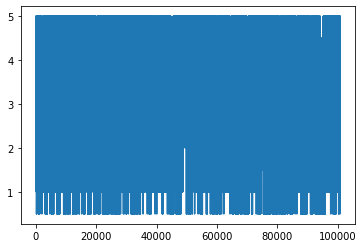

In [15]:
notas['nota'].plot()

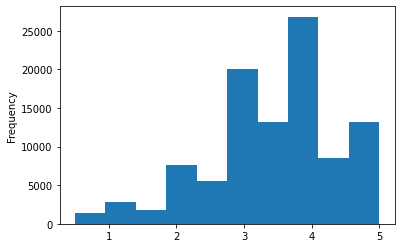

In [16]:
# Exibindo um histograma, que é mais indicado que o outro acima
notas['nota'].plot(kind='hist')

In [17]:
# Importando uma biblioteca gráfica
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


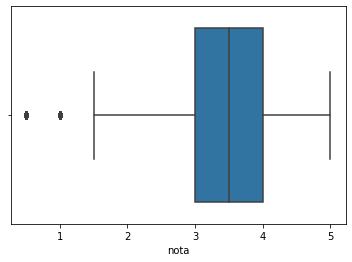

In [22]:
# Plot boxplot
print(sns.boxplot(notas['nota']))

AxesSubplot(0.125,0.125;0.775x0.755)


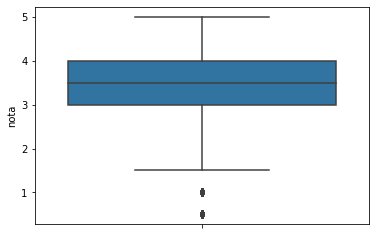

In [23]:
# Invertendo o eixo Y
print(sns.boxplot(y=notas['nota']))

# **Olhando os filmes**

In [25]:
filmes = pd.read_csv("movies.csv")

In [26]:
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [27]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [28]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# **Analisando algumas notas especificas por filme**

In [41]:
# Buscar as notas do filme de ID == 1
ts = notas.query("filmeId == 1").nota
notas.query("filmeId == 1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [39]:
# Menor nota para ToyStory
ts.min()

0.5

In [44]:
# Buscando a nota média do filme com ID == 1
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [43]:
notas.groupby("filmeId")

In [53]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [46]:
media_por_filme = notas.groupby("filmeId").mean().nota
media_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

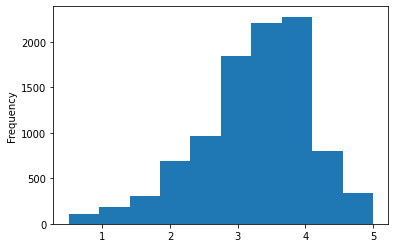

In [48]:
media_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


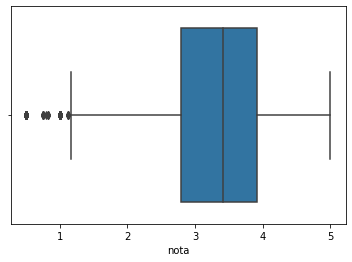

In [54]:
sns.boxplot(media_por_filme)

In [55]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [57]:
notas.query("nota == 5")

,usuarioId,filmeId,nota,momento
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


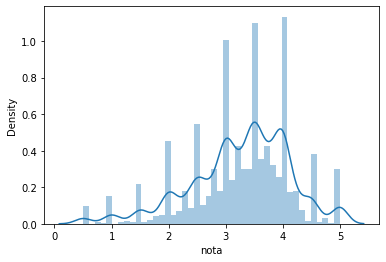

In [63]:
sns.distplot(media_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


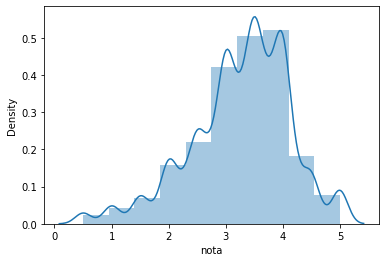

In [64]:
# Utilizando o bin para escolher um número de barras (bin)
sns.distplot(media_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias por filme')

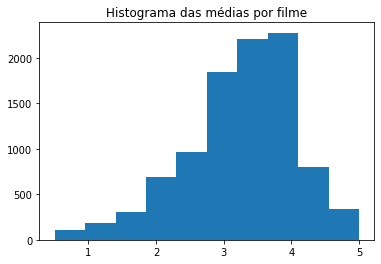

In [66]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Histograma das médias por filme")

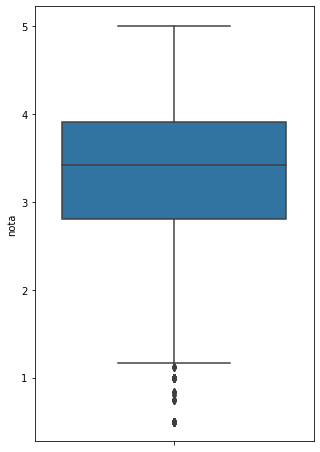

In [68]:
plt.figure(figsize = (5,8))
sns.boxplot(y=media_por_filme)